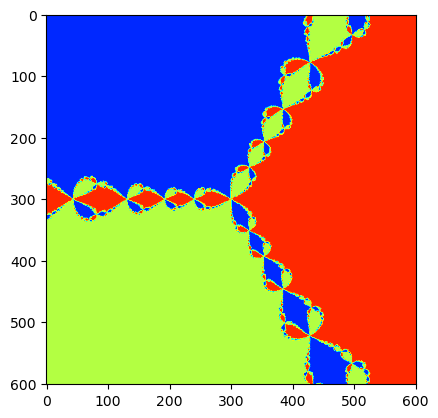

In [1]:
#
# f(x) = x^3 - 1 に対する複素Newton法
#
using PyPlot
function newton_fractal(center = Complex(0.0), width = 2.0)
    N = 300;  iter = 0; maxiter =100;  tol = 1e-4
    J = zeros(2N + 1, 2N + 1);
    ω = Complex(-1/2, sqrt(3)/2)
    root = [1, ω, conj(ω)]  # conj()は複素共役
    root_color = [2.6, 0.5, 1.7] # 解ごとの色設定
    
    for i in -N:N, j in -N:N
        z = center + (i+j*im)/N*width; 
        iter = 0; color = 0;
        # Newton法の反復
        for l in 1:maxiter
            z = z - (z^3-1)/(3z^2) 
            # 停止条件
            if minimum([abs(z - a) for a in root]) < tol
                iter = l; break
            end
        end
        
        if (iter == maxiter) 
            color = 3
        else
            # 停止時にzが一番近い解の色に設定
            min_dist, ind = findmin([abs(z - r) for r in root])
            color = root_color[ind] 
        end
        J[N + 1 - j,N + 1 + i] = color
    end
    return J
end

J = newton_fractal(Complex(0), 4.00)
img = imshow(J, cmap="jet")
clim(0,3)
#colorbar(img)     # カラーバーの表示